In [1]:
import os
from pylab import *
import matplotlib.pyplot as plt
from IPython.core.display import display,HTML
import math
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb

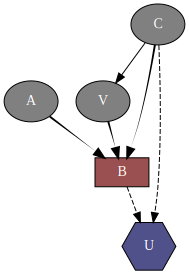

In [2]:
"""
Créer un ID avec des strings
*D = noeud décision
$U = noeud d'utilité
C  = noeud chance
"""
ID1=gum.fastID("A->*B<-C->V->B->$U<-C")
gnb.showInfluenceDiagram(ID1)

In [3]:
"Créer un ID avec des fonctions (sans doute comment on va proceder)"
ID2=gum.fastID("")


#Façon de créer des noeuds LabelizedVariable(aName, aDesc=’’, nbrLabel=2) -> LabelizedVariable
chanceNode=ID2.addChanceNode(gum.LabelizedVariable("nameChance","DescriptionOptionelleChance",3))
UtilityNode=ID2.addUtilityNode(gum.LabelizedVariable("nameUtility","DescriptionOptionelleUtility",1))
DecisionNode=ID2.addDecisionNode(gum.LabelizedVariable("nameDecision","DescriptionOptionelleDecision",2))
ID2.addChanceNode(gum.LabelizedVariable("chance2","DescriptionOptionelleChance",2))
ID2.addChanceNode(gum.LabelizedVariable("chance3","DescriptionOptionelleChance",2))
ID2.addArc("chance2","nameChance")
ID2.addArc("chance3","nameChance")

#Façon d'ajouter un arc
ID2.addArc(chanceNode,DecisionNode)
ID2.addArc(DecisionNode,ID2.idFromName("nameUtility"))




ID2.utility(UtilityNode)[{'nameDecision':0}]=10
ID2.utility(UtilityNode)[{'nameDecision':1}]=5
#gnb.sideBySide(ID2,gnb.getInference(ID2))

#gnb.showInfluenceDiagram(ID2)

ID2.variable(ID2.idFromName("nameDecision")).domain()


I=gum.Instantiation(ID2.cpt("nameChance"))

while not I.end():
    ID2.cpt(chanceNode).set(I,0.2)
    print(I)
    I.inc()
print(ID2.cpt("nameChance"))

<nameChance:0|chance2:0|chance3:0>
<nameChance:1|chance2:0|chance3:0>
<nameChance:2|chance2:0|chance3:0>
<nameChance:0|chance2:1|chance3:0>
<nameChance:1|chance2:1|chance3:0>
<nameChance:2|chance2:1|chance3:0>
<nameChance:0|chance2:0|chance3:1>
<nameChance:1|chance2:0|chance3:1>
<nameChance:2|chance2:0|chance3:1>
<nameChance:0|chance2:1|chance3:1>
<nameChance:1|chance2:1|chance3:1>
<nameChance:2|chance2:1|chance3:1>

             ||  nameChance                 |
chance|chance||0        |1        |2        |
------|------||---------|---------|---------|
0     |0     || 0.2000  | 0.2000  | 0.2000  |
1     |0     || 0.2000  | 0.2000  | 0.2000  |
0     |1     || 0.2000  | 0.2000  | 0.2000  |
1     |1     || 0.2000  | 0.2000  | 0.2000  |



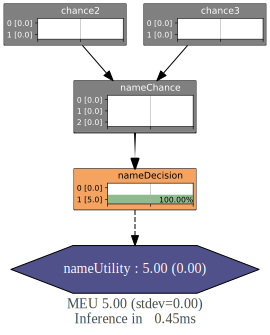

In [4]:
#Forcer une décision
gnb.showInference(ID2,evs={'nameDecision':'1'})

In [9]:
import numpy as np
"""
chances contient tous les identifiants des noeuds chance de l'ID, par convention, si l'ID est égal à
0 mod(6) --> le noeud est un x
1 mod(6) --> le noeud est un y
2 mod(6) --> le noeud est un n
3 mod(6) --> le noeud est un e
4 mod(6) --> le noeud est un s
5 mod(6) --> le noeud est un w

decision contient tous les identifiants des noeuds décisions de l'ID, par convention, si l'ID est égal à 
6*n+i pour tout i appartenant à 0,...,n-1, le noeud est le noeud décision de la ième étape.
"""

"""
Méthode permettant de créer le diagramme d'influence de l'exemple du robot vu dans l'article "2013_Solving_Limited_Memory_Influence_Diagrams_Using_BranchAndBound"

Entrée : 
    n - nombre de stage
    xInitial - coordonnée x initial où on dépose le robot
    yInitial - coordonnée y initial où on dépose le robot
Sortie :
    ID - le diagramme d'influence correspondant à la modélisation du problème
"""
def createIDRobot(n,xInitial,yInitial):
    #gris est l'ensemble des coordonnées des cases grises
    cases,gris=getCasesAndGris()
    #listes qui énumère les cases ou on peut faire un pas dans une certaine direction (càd pas de mur dans cette direction quand on est sur cette case)
    casesOuPossibleAllerGauche=[]
    casesOuPossibleAllerHaut=[]
    casesOuPossibleAllerDroite=[]
    casesOuPossibleAllerBas=[]

    #constructions des listes ci-dessus
    for x in range(9):
        for y in range(7):
            if(cases[x,y,0]==0):
                casesOuPossibleAllerGauche.append([x,y])
            if(cases[x,y,1]==0):
                casesOuPossibleAllerHaut.append([x,y])
            if(cases[x,y,2]==0):
                casesOuPossibleAllerDroite.append([x,y])
            if(cases[x,y,3]==0):
                casesOuPossibleAllerBas.append([x,y])
    #création de l'ID
    ID=gum.fastID("")
    #tous les noeuds chances, regroupés selon leur stages (0 étant celui du premier stage)
    chances=np.zeros((n,6))
    #tous les noeuds décisions, celui à l'indice 0 étant celui du premier stage
    decision=np.zeros(n)
   
    for i in range(n):
        #définition des noms, pour eviter les opérations non necessaires
        x=f"x_{i}"
        y=f"y_{i}"
        ns=f"ns_{i}"
        es=f"es_{i}"
        ss=f"ss_{i}"
        ws=f"ws_{i}"
        d=f"d_{i}"

        #Création des noeuds 
        #ajout noeuds position x
        chances[i][0]=int(ID.addChanceNode(gum.LabelizedVariable(x,"",9),6*i))
        #ajout noeuds position y
        chances[i][1]=int(ID.addChanceNode(gum.LabelizedVariable(y,"",7),6*i+1))
        #ajout noeuds capteurs selon coordonnées cardinales
        chances[i][2]=ID.addChanceNode(gum.LabelizedVariable(ns,"",2),6*i+2)
        chances[i][3]=ID.addChanceNode(gum.LabelizedVariable(es,"",2),6*i+2+1)
        chances[i][4]=ID.addChanceNode(gum.LabelizedVariable(ss,"",2),6*i+2+2)
        chances[i][5]=ID.addChanceNode(gum.LabelizedVariable(ws,"",2),6*i+2+3)
        #ajout noeud de décision
        decision[i]=int(ID.addDecisionNode(gum.LabelizedVariable(d,"",5),i+50000))


        

        #Creation des arcs entre x,y et les capteurs de l'étape courante
        ID.addArc(x,y)
        ID.addArc(x,ns)
        ID.addArc(x,es)
        ID.addArc(x,ss)
        ID.addArc(x,ws)
        ID.addArc(y,ns)
        ID.addArc(y,es)
        ID.addArc(y,ss)
        ID.addArc(y,ws)

        #Création des arcs depuis TOUS les noeuds chances des capteurs vers le noeud de décision courant
        #de l'étape
        for stage in range(i+1):
            ID.addArc(int(chances[(stage)][2]),ID.idFromName(d))
            ID.addArc(int(chances[(stage)][3]),ID.idFromName(d))
            ID.addArc(int(chances[(stage)][4]),ID.idFromName(d))
            ID.addArc(int(chances[(stage)][5]),ID.idFromName(d))
        #Création des arcs depuis x_i-1 vers x_i et de y_i-1 vers y_i (seulement à partir de la deuxième étape)
        if(i>0):
            ID.addArc(f"x_{i-1}",y)
            ID.addArc(f"x_{i-1}",x)
            ID.addArc(f"y_{i-1}",y)
            ID.addArc(f"y_{i-1}",x)

            #Création des arcs entre le noeud de décision de la i-1 ème étape vers x_i et y_i
            ID.addArc(f"d_{i-1}",x)
            ID.addArc(f"d_{i-1}",y)


        #ajout potentiels des noeuds chance capteur ns es ss ws, de support {0=pas mur,1=mur}
        for h in range(9):
            for j in range(7):
                ID.cpt(ns)[{x:h,y:j}]=[0,1]
                ID.cpt(es)[{x:h,y:j}]=[0,1]
                ID.cpt(ss)[{x:h,y:j}]=[0,1]
                ID.cpt(ws)[{x:h,y:j}]=[0,1]
            for g in range(2,6):
                ID.cpt(ns)[{x:2,y:g}]=[1,0]
                ID.cpt(ns)[{x:4,y:g}]=[1,0]
                ID.cpt(ns)[{x:6,y:g}]=[1,0]

                ID.cpt(es)[{x:g,y:1}]=[1,0]
                ID.cpt(es)[{x:g,y:5}]=[1,0]

            ID.cpt(es)[{x:1,y:2}]=[1,0]
            ID.cpt(es)[{x:1,y:4}]=[1,0]
            ID.cpt(es)[{x:6,y:2}]=[1,0]
            ID.cpt(es)[{x:6,y:4}]=[1,0]
            for g in range(1,5):
                ID.cpt(ss)[{x:2,y:g}]=[1,0]
                ID.cpt(ss)[{x:4,y:g}]=[1,0]
                ID.cpt(ss)[{x:6,y:g}]=[1,0]
            for g in range(3,7):
                ID.cpt(ws)[{x:g,y:2}]=[1,0]
                ID.cpt(ws)[{x:g,y:5}]=[1,0]
            ID.cpt(ws)[{x:2,y:2}]=[1,0]
            ID.cpt(ws)[{x:2,y:4}]=[1,0]
            ID.cpt(ws)[{x:7,y:2}]=[1,0]
            ID.cpt(ws)[{x:7,y:4}]=[1,0]

    #ajout potentiels des noeuds positions x y au premier stage
        if(i==0):
            ID.cpt(x)[xInitial]=1
            ID.cpt(y)[{x:xInitial,y:yInitial}]=1
    #ajout potentiels des noeuds positions x y aux stages qui ne sont pas le premier stage
        else:
            remplirID(ID,x,fillX,i,casesOuPossibleAllerGauche,
    casesOuPossibleAllerHaut,
    casesOuPossibleAllerDroite,
    casesOuPossibleAllerBas)
            remplirID(ID,y,fillY,i,casesOuPossibleAllerGauche,
    casesOuPossibleAllerHaut,
    casesOuPossibleAllerDroite,
    casesOuPossibleAllerBas)

    #Ajout des arcs entre le dernier noeud décision, les derniers noeuds chances x et y avec le noeud utilité
    xn=f"x_{n}"
    yn=f"y_{n}"
    ID.addArc(int(decision[n-1]),ID.addChanceNode(gum.LabelizedVariable(xn,"",9)))
    ID.addArc(int(decision[n-1]),ID.addChanceNode(gum.LabelizedVariable(yn,"",7)))
    ID.addArc(xn,yn)
    ID.addUtilityNode(gum.LabelizedVariable("u","",1))
    ID.addArc(xn,"u")
    ID.addArc(yn,"u")
    ID.addArc(f"x_{n-1}",xn)
    ID.addArc(f"y_{n-1}",xn)
    ID.addArc(f"x_{n-1}",yn)
    ID.addArc(f"y_{n-1}",yn)
    #ajout potentiels des derniers noeuds chances et du noeud d'utilité
    remplirID(ID,xn,fillX,n,casesOuPossibleAllerGauche,
    casesOuPossibleAllerHaut,
    casesOuPossibleAllerDroite,
    casesOuPossibleAllerBas)
    remplirID(ID,yn,fillY,n,casesOuPossibleAllerGauche,
    casesOuPossibleAllerHaut,
    casesOuPossibleAllerDroite,
    casesOuPossibleAllerBas)
    
    ID.utility(ID.idFromName("u"))[{f"x_{n}":7,f"y_{n}":4}]=1
    
    return ID

"""
Méthode qui sert à remplir le tableau de potentiel des noeuds positions x et y aux stages après au premier stage
Entrée : 
    InfluenceDiagram ID - le diagramme d'influence sur lequel trouver tous les noeuds
    String NomNoeud - le nom du noeud qu'on veut remplir le tableau de potentiel 
    function fonctionFill - la fonction utilisée afin de remplir les cases du tableau
    Integer stage - entier qui identifie le stage courant
Sortie:
    void
"""
def remplirID(ID,NomNoeud,fonctionFill,stage,casesOuPossibleAllerGauche,
    casesOuPossibleAllerHaut,
    casesOuPossibleAllerDroite,
    casesOuPossibleAllerBas):
    I=gum.Instantiation(ID.cpt(NomNoeud))
    while not I.end():
        ID.cpt(NomNoeud).set(I,fonctionFill(I,stage,casesOuPossibleAllerGauche,
    casesOuPossibleAllerHaut,
    casesOuPossibleAllerDroite,
    casesOuPossibleAllerBas))
        I.inc()
"""
Méthode qui sert à déterminer quelle probabilité on introduit dans la case d'un certain tableau de potentiel d'un noeud chance correspondant à la position X (abscisse) du robot à un certain stage.
Entrée :
    Instantiation I - correspond à une certaine case du tableau de potentiel qu'on remplit, on fait des tests dessus afin de savoir quelle                           probabilité donner à cette case.
    Integer i - entier correspondant au stage courant.
""" 
def fillX(I,i,casesOuPossibleAllerGauche,
    casesOuPossibleAllerHaut,
    casesOuPossibleAllerDroite,
    casesOuPossibleAllerBas):
    valeurXStageDavant,valeurYStageDavant,valeurX,decisionDStageDavant=[I.val(nomNoeud) for nomNoeud in [f"x_{i-1}",f"y_{i-1}",f"x_{i}",f"d_{i-1}"]]
    if([valeurXStageDavant,valeurYStageDavant] in gris):
        return 0
    if(abs(valeurX-valeurXStageDavant)>1):
        return 0
    #-----------------------    
    if(decisionDStageDavant==0): #decision = gauche
        if([valeurXStageDavant,valeurYStageDavant] in casesOuPossibleAllerGauche):
            if(valeurX==valeurXStageDavant-1):
                return 0.89+0.01
            if(valeurX==valeurXStageDavant):
                return 0.089
            if(valeurX==valeurXStageDavant+1 and [valeurXStageDavant,valeurYStageDavant] in casesOuPossibleAllerDroite): #on teste en plus si on peut aller à droite pour savoir si on peut mettre une proba dessus
                return 0.01
        else:
            if(valeurX==valeurXStageDavant-1): #(je sais que c'est de base à 0 mais je garde pour la compréhension du code)
                return 0
            if(valeurX==valeurXStageDavant):
                return 0.089
            if(valeurX==valeurXStageDavant+1 and [valeurXStageDavant,valeurYStageDavant] in casesOuPossibleAllerDroite):
                return 0.01
    #-----------------------             
    if(decisionDStageDavant==1): #decision = haut
        if([valeurXStageDavant,valeurYStageDavant] in casesOuPossibleAllerHaut):
            if(valeurX==valeurXStageDavant-1 and [valeurXStageDavant,valeurYStageDavant] in casesOuPossibleAllerGauche):
                return 0.01
            if(valeurX==valeurXStageDavant):
                return 0.89+0.089
            if(valeurX==valeurXStageDavant+1 and [valeurXStageDavant,valeurYStageDavant] in casesOuPossibleAllerDroite):
                return 0.01
        else:
            if(valeurX==valeurXStageDavant-1 and [valeurXStageDavant,valeurYStageDavant] in casesOuPossibleAllerGauche):
                return 0.01
            if(valeurX==valeurXStageDavant): #pas sur sur la proba à mettre 0.89 ou 0.089 ou 0??
                return 0.089
            if(valeurX==valeurXStageDavant+1 and [valeurXStageDavant,valeurYStageDavant] in casesOuPossibleAllerDroite):
                return 0.01
    #-----------------------  
    if(decisionDStageDavant==2): #decision = droite
        if([valeurXStageDavant,valeurYStageDavant] in casesOuPossibleAllerDroite):
            if(valeurX==valeurXStageDavant-1 and [valeurXStageDavant,valeurYStageDavant] in casesOuPossibleAllerGauche):
                return 0.01
            if(valeurX==valeurXStageDavant):
                return 0.089
            if(valeurX==valeurXStageDavant+1):
                return 0.01+0.89
        else:
            if(valeurX==valeurXStageDavant-1 and [valeurXStageDavant,valeurYStageDavant] in casesOuPossibleAllerGauche):
                return 0.01
            if(valeurX==valeurXStageDavant): #pas sur sur la proba à mettre 0.89 ou 0.089 ou 0??
                return 0.089
            if(valeurX==valeurXStageDavant+1):
                return 0
    #-----------------------  
    if(decisionDStageDavant==3): #decision = bas
        if([valeurXStageDavant,valeurYStageDavant] in casesOuPossibleAllerBas):
            if(valeurX==valeurXStageDavant-1 and [valeurXStageDavant,valeurYStageDavant] in casesOuPossibleAllerGauche):
                return 0.01
            if(valeurX==valeurXStageDavant):
                return 0.89+0.089
            if(valeurX==valeurXStageDavant+1 and [valeurXStageDavant,valeurYStageDavant] in casesOuPossibleAllerDroite):
                return 0.01
        else:
            if(valeurX==valeurXStageDavant-1 and [valeurXStageDavant,valeurYStageDavant] in casesOuPossibleAllerGauche):
                return 0.01
            if(valeurX==valeurXStageDavant): #pas sur sur la proba à mettre 0.89 ou 0.089 ou 0??
                return 0.089
            if(valeurX==valeurXStageDavant+1 and [valeurXStageDavant,valeurYStageDavant] in casesOuPossibleAllerDroite):
                return 0.01
    #-----------------------  
    if(decisionDStageDavant==4): #decision = rester sur place
        if(valeurX==valeurXStageDavant-1 and [valeurXStageDavant,valeurYStageDavant] in casesOuPossibleAllerGauche):
                return 0.01
        if(valeurX==valeurXStageDavant):
                return 0.89
        if(valeurX==valeurXStageDavant+1 and [valeurXStageDavant,valeurYStageDavant] in casesOuPossibleAllerDroite):
                return 0.01
    return 0




"""
Méthode qui sert à déterminer quelle probabilité on introduit dans la case d'un certain tableau de potentiel d'un noeud chance correspondant à la position Y (ordonnée) du robot à un certain stage.
Entrée :
    Instantiation I - correspond à une certaine case du tableau de potentiel qu'on remplit, on fait des tests dessus afin de savoir quelle                           probabilité donner à cette case.
    Integer i - entier correspondant au stage courant.
""" 
def fillY(I,i,casesOuPossibleAllerGauche,
    casesOuPossibleAllerHaut,
    casesOuPossibleAllerDroite,
    casesOuPossibleAllerBas):
    valeurXStageDavant,valeurYStageDavant,valeurX,valeurY,decisionDStageDavant=[I.val(nomNoeud) for nomNoeud in [f"x_{i-1}",f"y_{i-1}",f"x_{i}",f"y_{i}",f"d_{i-1}"]]
    if([valeurXStageDavant,valeurYStageDavant] in gris):
        return 0
    if(abs(valeurX-valeurXStageDavant)>1 or abs(valeurY-valeurYStageDavant)>1):
        return 0
    #-----------------------  
    if(decisionDStageDavant==0): #decision = gauche
        if([valeurXStageDavant,valeurYStageDavant] in casesOuPossibleAllerGauche):
            if(valeurX==valeurXStageDavant): #X n'a pas bougé
                if(valeurY==valeurYStageDavant):#Y n'a pas bougé
                    return 0.089
                if(valeurY==valeurYStageDavant+1 and [valeurXStageDavant,valeurYStageDavant] in casesOuPossibleAllerBas):#Y a descendu
                    return 0.001
            if(valeurX==valeurXStageDavant-1): #X a fait un pas à gauche
                if(valeurY==valeurYStageDavant):#Y n'a pas bougé
                    return 0.89
                if(valeurY==valeurYStageDavant+1 and [valeurX,valeurYStageDavant] in casesOuPossibleAllerBas):#Y a descendu (on regarde bien valeurX pas valeurXStageDavant car X a bougé)
                    return 0.001
            if(valeurX==valeurXStageDavant+1 and [valeurXStageDavant,valeurYStageDavant] in casesOuPossibleAllerDroite): #X fait pas à droite
                if(valeurY==valeurYStageDavant):#Y n'a pas bougé
                    return 1-0.001
                if(valeurY==valeurYStageDavant+1 and [valeurX,valeurYStageDavant] in casesOuPossibleAllerBas):#Y a descendu 
                    return 0.001
    #-----------------------  
    if(decisionDStageDavant==1): #decision = haut
        if([valeurX,valeurYStageDavant] in casesOuPossibleAllerHaut): #ON REGARDE DIRECTEMENT VALEURX
            if(valeurY==valeurYStageDavant-1):#Y a bougé en haut
                return 0.89
            if(valeurY==valeurYStageDavant):#Y n'a pas bougé
                return 0.089
            if(valeurY==valeurYStageDavant+1 and [valeurX,valeurYStageDavant] in casesOuPossibleAllerBas):#Y a descendu
                return 0.001
    #-----------------------  
    if(decisionDStageDavant==2): #decision = droit
        if([valeurXStageDavant,valeurYStageDavant] in casesOuPossibleAllerDroite):
            if(valeurX==valeurXStageDavant): #X n'a pas bougé
                if(valeurY==valeurYStageDavant):#Y n'a pas bougé
                    return 0.089
                if(valeurY==valeurYStageDavant+1 and [valeurXStageDavant,valeurYStageDavant] in casesOuPossibleAllerBas):#Y a descendu
                    return 0.001
            if(valeurX==valeurXStageDavant-1 and [valeurXStageDavant,valeurYStageDavant] in casesOuPossibleAllerGauche): #X fait pas à gauche
                if(valeurY==valeurYStageDavant):#Y n'a pas bougé
                    return 1-0.001
                if(valeurY==valeurYStageDavant+1 and [valeurX,valeurYStageDavant] in casesOuPossibleAllerBas):#Y a descendu (on regarde bien valeurX pas valeurXStageDavant car X a bougé)
                    return 0.001
            if(valeurX==valeurXStageDavant+1 ): #X fait pas à droite
                if(valeurY==valeurYStageDavant):#Y n'a pas bougé
                    return 0.89
                if(valeurY==valeurYStageDavant+1 and [valeurX,valeurYStageDavant] in casesOuPossibleAllerBas):#Y a descendu 
                    return 0.001
    #-----------------------  
    if(decisionDStageDavant==3): #decision = bas
        if([valeurX,valeurYStageDavant] in casesOuPossibleAllerBas):
            if(valeurY==valeurYStageDavant+1):#Y a bougé en bas
                return 0.89
            if(valeurY==valeurYStageDavant):#Y n'a pas bougé
                return 0.089
            if(valeurY==valeurYStageDavant+1 and [valeurX,valeurYStageDavant] in casesOuPossibleAllerBas):#Y a descendu
                return 0.001
    #-----------------------  
    if(decisionDStageDavant==4): #decision = rester sur place
        if(valeurY==valeurYStageDavant+1 and [valeurX,valeurYStageDavant] in casesOuPossibleAllerBas):
            return 0.001
    return 0
#gnb.showInfluenceDiagram(createIDRobot(2,3,2))
#gnb.showInference(createIDRobot(2,3,2))
ID=createIDRobot(3,7,4)
gnb.sideBySide(ID,gnb.getInference(ID))

In [10]:
"""
Fonction qui retourne deux tableau :
gris : tableau de tableau de taille deux qui est l'ensemble des coordonnées des cases grisées
cases : tableau de 3 dimensions qui stocke, pour chaque direction cardinale, pour chaque case, si on peut faire un pas dans cette 
        direction (c'est à dire qu'il n'y pas de mur) 
        convention : cases[x,y,i]=0 si il n'y a pas de mur dans la direction i quand on est dans la case x,y et cases[x,y,i]=1 sinon. i                appartient à [0,1,2,3] qui correspondent à ouest,nord,est,surd respectivement.
"""
def getCasesAndGris():
    cases=np.zeros((9,7,4)) #cases est qui stocke, selon les directions, si on peut faire le pas dans la direction ou non (0 oui, 1 non)
    gris=[]
    for h in range(9):
        gris.append([h,0])
        gris.append([h,6])
    for h in range(7):
        gris.append([0,h])
        gris.append([8,h])
    gris.append([1,1])
    gris.append([1,3])
    gris.append([1,5])
    gris.append([3,2])
    gris.append([3,3])
    gris.append([3,4])
    gris.append([5,2])
    gris.append([5,3])
    gris.append([5,4])
    gris.append([7,1])
    gris.append([7,3])
    gris.append([7,5])

    for g in gris:
        x,y=g
        for i in range(4):
            cases[x,y,i]=1
    #traits hozizontaux
    for x in range(2,7):
        cases[x,1][1]=1
        cases[x,5][3]=1

    cases[2,1][0]=1
    cases[2,5][0]=1
    cases[6,1][2]=1
    cases[6,5][2]=1
    cases[3,1,3]=1
    cases[5,1,3]=1
    cases[3,5,1]=1
    cases[5,5,1]=1

    #traits verticaux
    for y in range(2,5):
        cases[4,y][0]=1
        cases[4,y][2]=1

        cases[2,y][2]=1
        cases[6,y][0]=1

    cases[6,3][2]=1
    cases[2,3][0]=1

    #autres
    cases[1,2,0]=1
    cases[1,2,1]=1
    cases[1,2,3]=1

    cases[1,4,0]=1
    cases[1,4,1]=1
    cases[1,4,3]=1

    cases[7,2,2]=1
    cases[7,2,1]=1
    cases[7,2,3]=1

    cases[7,4,2]=1
    cases[7,4,1]=1
    cases[7,4,3]=1

    
    return cases,gris
cases,gris=getCasesAndGris()
for i in range(4):
        print(cases[:,:,[i]].T,"\n")

[[[1. 1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 0. 0. 0. 0. 1. 1.]
  [1. 1. 0. 1. 1. 1. 1. 0. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 0. 1. 1. 1. 1. 0. 1.]
  [1. 1. 1. 0. 0. 0. 0. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1. 1.]]] 

[[[1. 1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 0. 1. 0. 1. 0. 1. 1.]
  [1. 1. 0. 1. 0. 1. 0. 1. 1.]
  [1. 1. 0. 1. 0. 1. 0. 1. 1.]
  [1. 1. 0. 1. 0. 1. 0. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1. 1.]]] 

[[[1. 1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 0. 0. 0. 0. 1. 1. 1.]
  [1. 0. 1. 1. 1. 1. 0. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 0. 1. 1. 1. 1. 0. 1. 1.]
  [1. 1. 0. 0. 0. 0. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1. 1.]]] 

[[[1. 1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 0. 1. 0. 1. 0. 1. 1.]
  [1. 1. 0. 1. 0. 1. 0. 1. 1.]
  [1. 1. 0. 1. 0. 1. 0. 1. 1.]
  [1. 1. 0. 1. 0. 1. 0. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1. 1.]]] 

